In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [0]:
from __future__ import unicode_literals, print_function, division
from io import open
import unicodedata
import string
import re
import random

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
  
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import torch
import torch.nn as nn 
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from io import open
from collections import Counter
from functools import partial
import unicodedata
import re
from torch.autograd import Variable
from gensim.models import KeyedVectors
from gensim.models.wrappers import FastText
import random
import time
from datetime import datetime
import pickle as pkl
import string
import os
from os import listdir 
from ast import literal_eval
from nltk.tokenize import WordPunctTokenizer 


import numpy as np 
import pandas as pd 
import torch
import torch.nn as nn 
import torch.nn.functional as F
from torch.autograd import Variable
import random
import math 





import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import torch
import torch.nn as nn 
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.autograd import Variable
import sacrebleu
import random
import time
from datetime import datetime
import pickle as pkl
import string
import os
from os import listdir 
from ast import literal_eval
from sklearn.metrics import confusion_matrix
import matplotlib.style
import matplotlib as mpl
from collections import OrderedDict
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [0]:
#!pip install sacrebleu

     |████████████████████████████████| 61kB 8.5MB/s 
     |████████████████████████████████| 17.1MB 187kB/s 


In [0]:
SRC_LANG = 'en'
TARG_LANG = 'od'

SRC_MAX_SENTENCE_LEN = 10
TARG_MAX_SENTENCE_LEN = 10
SRC_VOCAB_SIZE = 10000 
TARG_VOCAB_SIZE = 10000 # odia only has 6246 tokens. so will change this later

BATCH_SIZE = 64

## Data Preprocessing

### Split and save raw data into train.src.tok, train.targ.tok, val.src.tok, val.targ.tok, test.src.tok, test.targ.tok

In [0]:
#### Create full data for (English, Pashto): combining 4 files each (not needed if you have the dataset in your directory)

# en_ps_EN = ['bible.en-ps.clean.en', 'KDE4.en-ps.en', 'ted-wmt20.en-ps.en', 'Ubuntu.en-ps.en']
# en_ps_PS = ['bible.en-ps.clean.ps', 'KDE4.en-ps.ps', 'ted-wmt20.en-ps.ps', 'Ubuntu.en-ps.ps']
# with open('/content/drive/My Drive/ds1012/MT/data/en-ps/en.tok', 'w') as outfile:
#     for file_name in en_ps_EN:
#         with open("/content/drive/My Drive/ds1012/MT/data/en-ps/{}".format(file_name)) as infile:
#             outfile.write(infile.read())
#         outfile.write('\n')
# with open('/content/drive/My Drive/ds1012/MT/data/en-ps/ps.tok', 'w') as outfile:
#     for file_name in en_ps_PS:
#         with open("/content/drive/My Drive/ds1012/MT/data/en-ps/{}".format(file_name)) as infile:
#             outfile.write(infile.read())
#         outfile.write('\n')

In [0]:
#### Create train, dev, test for (English, Pashto)

# random.seed(1234)

# with open('/content/drive/My Drive/ds1012/MT/data/en-ps/en.tok') as infile:
#     data = infile.readlines()
# train_idx = int(len(data)*0.7)
# dev_idx = int(len(data)*0.85)
# random.shuffle(data)
# train = data[:train_idx]
# dev = data[train_idx:dev_idx]
# test = data[dev_idx:]

# with open('/content/drive/My Drive/ds1012/MT/data/en-ps/train.en.tok', 'w') as outfile:
#     outfile.write("".join(train))
# with open('/content/drive/My Drive/ds1012/MT/data/en-ps/dev.en.tok', 'w') as outfile:
#     outfile.write("".join(dev))
# with open('/content/drive/My Drive/ds1012/MT/data/en-ps/test.en.tok', 'w') as outfile:
#     outfile.write("".join(test))

# with open('/content/drive/My Drive/ds1012/MT/data/en-ps/ps.tok') as infile:
#     data = infile.readlines()

# random.shuffle(data)
# train = data[:train_idx]
# dev = data[train_idx:dev_idx]
# test = data[dev_idx:]

# with open('/content/drive/My Drive/ds1012/MT/data/en-ps/train.ps.tok', 'w') as outfile:
#     outfile.write("".join(train))
# with open('/content/drive/My Drive/ds1012/MT/data/en-ps/dev.ps.tok', 'w') as outfile:
#     outfile.write("".join(dev))
# with open('/content/drive/My Drive/ds1012/MT/data/en-ps/test.ps.tok', 'w') as outfile:
#     outfile.write("".join(test))

In [0]:
# show examples for ps
with open('/content/drive/My Drive/ds1012/MT/data/en-ps/train.ps.tok') as f:
    data = f.read().split('\n')
data[:10]
# Note: data are not clean where both en and ps has sentence like '%d:%02d:%02d'

['مخبره',
 'دا د اِسمٰعيل زامن وُو ، چې په دې ترتيب سره پېدا شوى وُو : نبايوت ، قيدار ، ادبيئل ، مِبسام ،',
 'د کډي د کتابتونونو لپاره په مختاړي کې وژباړل شو',
 'د قوم د راغونډولو د خبر د پاره به دواړه بيګلې غږولے شى . خو دا آواز به لنډ نۀ وى .',
 'په پرليکه اکر کې پېلول',
 '. دا خوښبکس وتوانوﺉ چې د ليکبڼه ډول امستنې بدلې کړﺉ@ info: tooltip',
 'عيسىٰ دَ هغوئ سره دَ غرۀ نه راکُوز شو اَؤ په هوار ميدان کښے ودريدو . په دغه ځائے کښے دَ هغۀ ګڼ مُريدان اَؤ ډير خلق چه ټول دَ يهُوديه اَؤ بيتُ المُقدس دَ صور اَؤ دَ صيدا دَ سمندرى غاړے نه راټول شوى وُو اَؤ دَ هغۀ آؤريدو ته راغلى وُو اَؤ چه دوئ دَ خپلو رنځُونو نه شفا ومُومى .',
 'ننوت لېلې_',
 'خو کله چه هغوئ دَ عيسىٰ خوا ته راغلل نو هغه ئے وليدو چه مړ دے ، نو هغوئ دَ هغۀ پښے ماتے نۀ کړلے .',
 '%d:%02d:%02d5:02:%Id%dshort time format']

In [0]:
#### Create train, dev, test for (English, Odia)

# for i in ['train', 'dev', 'test']:
#     with open('/content/drive/My Drive/ds1012/MT/data/en-od/{}.final'.format(i)) as infile:
#         lines = infile.readlines()
#     en_od_EN = []
#     en_od_OD = []
#     for line in lines:
#         en_od_EN.append(line.split('\t')[1])
#         en_od_OD.append(line.split('\t')[2])
#     with open('/content/drive/My Drive/ds1012/MT/data/en-od/{}.en.tok'.format(i), 'w') as outfile:
#         outfile.write("\n".join(en_od_EN))
#     with open('/content/drive/My Drive/ds1012/MT/data/en-od/{}.od.tok'.format(i), 'w') as outfile:
#         outfile.write("".join(en_od_OD))

In [0]:
#### Show examples for od
with open('/content/drive/My Drive/ds1012/MT/data/en-od/train.od.tok') as f:
    data = f.read().split('\n')
data[:10]

['ଆରମ୍ଭରେ ପରମେଶ୍ବର ଆକାଶ ଓ ପୃଥିବୀକୁ ସୃଷ୍ଟି କଲେ।',
 'ପୃଥିବୀ ସେତବେେଳେ ସଂପୂରନ୍ଭାବେ ଶୂନ୍ଯ ଓ କିଛି ନଥିଲା। ଜଳଭାଗ ଉପରେ ଅନ୍ଧକାର ଘାଡ଼ଇେେ ରଖିଥିଲା ଏବଂ ପରମେଶ୍ବରଙ୍କର ଆତ୍ମା ଜଳଭାଗ ଉପରେ ବ୍ଯାପ୍ତ ଥିଲା।',
 'ପରମେଶ୍ବର ଆଲୋକକୁ ଦେଖିଲେ ଏବଂ ସେ ଜାଣିଲେ, ତାହା ଉତ୍ତମ, ଏହାପ ରେ ପରମେଶ୍ବର ଆଲୋକକୁ ଅନ୍ଧକାରରୁ ଅଲଗା କଲେ।',
 'ପରମେଶ୍ବର ସହେି ଆଲୋକର ନାମ ଦେଲେ " ଦିନ" ଏବଂ ଅନ୍ଧକାରର ନାମ ଦେଲେ "ରାତି।"',
 'ଏହାପରେ ପରମେଶ୍ବର କହିଲେ, "ଜଳ ମଧିଅରେ ବୃହତ ଗମ୍ବୁଜ ଜାତ ହାଇେ ଜଳକୁ ଦୁଇଭାଗ କରୁ!"',
 'ଏହିପରି ପରମେଶ୍ବର ତାରଣେ ନିର୍ମାଣ କଲେ ଏବଂ ତାଣେ ଉପର ଜଳଠାରୁ ତାରଣେ ତଳ ଜଳକୁ ଅଲଗା କଲେ। ତହିଁରେ ସହେିପରି ହେଲା।',
 'ପରମେଶ୍ବର ସହେି ତାରଣେ ନାମ ଦେଲେ "ଆକାଶ" ତା\'ପରେ ସଠାେ ରେ ପ୍ରଭାତ ଏବଂ ସଠାେରେ ସୁର୍ୟ୍ଯାସ୍ତ ହେଲା। ଏବଂ ଏହା ଦି୍ବତୀଯ ଦିନ ଥିଲା।',
 'ଏହାପରେ ପରମେଶ୍ବର କହିଲେ, "ଆକାଶମଣ୍ଡଳ ଅଧଃସ୍ଥ ସମଗ୍ର ଜଳ ଏକ ସ୍ଥାନ ରେ ସଂଗୃହିତ ହେଉ। ୟଦ୍ବାରା ଭୂମି ଶୁଖିଲା ଦଖାୟିବେ।" ଏବଂ ଏହିପରି ହେଲା।',
 'ପରମେଶ୍ବର ଶୁଖିଲା ଭୂମିର ନାମ "ପୃଥିବୀ" ଦେଲେ। ଏବଂ ଜଳସମୁହ ଭାଗର ନାମ ଦେଲେ, "ସମୁଦ୍ର।" ଏହା ପରମେଶ୍ବରଙ୍କ ଦୃଷ୍ଟିରେ ଅତି ଉତ୍ତମ ଦିଶିଥିଲା।',
 'ପରମେଶ୍ବର କହିଲେ, "ପୃଥିବୀ ତୃଣ ଓ ସଜୀବ ଶାକ, ଜୀବ ସମ୍ବଳିତ ନିଜ ନିଜ ଜାତି ଅନୁୟାଯୀ ଫଳ ଉତ୍ପନ୍ନ କରୁ," ଏହିପରି

### Generate Vocab and Tokenize

In [0]:
RESERVED_TOKENS = {'<SOS>': 0, '<EOS>': 1, '<PAD>': 2, '<UNK>': 3}

def get_filepath(split, src_lang, targ_lang, lang_type): 
    """ Locates data filepath given data split type (train/dev/test), translation pairs (src_lang -> targ_lang), 
        and the language type (source or target) 
        e.g. to load train.en.tok for en-ps pair, use get_filepath(split='train', src_lang='en', targ_lang='ps', lang_type='source')
    """
    folder_name = "/content/drive/My Drive/ds1012/MT/data/{}-{}/".format(src_lang, targ_lang)
    if lang_type == 'source': 
        file_name = "{}.{}.tok".format(split, src_lang)
    elif lang_type == 'target': 
        file_name = "{}.{}.tok".format(split, targ_lang)
    return folder_name + file_name


def build_vocab(token_lists, max_vocab_size): 
    """ Takes lists of tokens (representing sentences of words), max_vocab_size and returns: 
        - id2token: list of tokens, where id2token[i] returns token that corresponds to i-th token 
        - token2id: dictionary where keys represent tokens and corresponding values represent their indices
        Note that the vocab will comprise N=max_vocab_size-len(RESERVED_TOKENS) most frequently occuring tokens
    """
    num_vocab = max_vocab_size - len(RESERVED_TOKENS)
    all_tokens = [token for sublist in token_lists for token in sublist]
    token_counter = Counter(all_tokens)
    vocab, count = zip(*token_counter.most_common(num_vocab))
    id2token = sorted(RESERVED_TOKENS, key=RESERVED_TOKENS.get) + list(vocab)
    token2id = dict(zip(id2token, range(max_vocab_size)))
    
    # check how many unique tokens + pct of corpus are represented in our vocab 
    tokens_in_vocab_pct_corpus = 100 * sum([token_counter[token] for token in vocab]) / len(all_tokens)
    print("A vocabulary of {} is generated from a set of {} unique tokens, representing {:.1f}% of entire corpus".format(
        len(vocab), len(token_counter), tokens_in_vocab_pct_corpus))
    
    return token2id, id2token 



def generate_vocab(src_lang, targ_lang, src_vocab_size, targ_vocab_size):
    """ 
        Takes source and target language names and vocab sizes, outputs a nested dictionary vocab 
        containing token2id and id2token for both source and target languages. 
        Note the first level of keys is lang_name (e.g. 'en'), and that of nested dictionary are token2id and id2token.
    """
    vocab = {} 
    for lang, vocab_size in zip([src_lang, targ_lang], [src_vocab_size, targ_vocab_size]): 
        
        # load train data 
        train_data_fp = get_filepath(split='train', src_lang=src_lang, targ_lang=targ_lang, 
                                     lang_type='source' if lang == 'en' else 'target')
        # tokenize train data
        tk = WordPunctTokenizer() 
        with open(train_data_fp) as f:
            train_tokens = [tk.tokenize(line) for line in f.readlines()]

        # generate token2id and id2token 
        token2id, id2token = build_vocab(train_tokens, vocab_size) 
        
        # store token2id, id2token as a dict in nested dict lang 
        vocab[lang] = {'token2id': token2id, 'id2token': id2token}
        
    return vocab

In [0]:
### it takes a long time to generate vocabulary, so save to pickle for reimport in future 

## en-ps pair
# SRC_LANG = 'en'
# TARG_LANG = 'ps'
# SRC_VOCAB_SIZE = 10000 
# TARG_VOCAB_SIZE = 10000 
# vocab = generate_vocab(SRC_LANG, TARG_LANG, SRC_VOCAB_SIZE, TARG_VOCAB_SIZE)
# vocab_filename = "/content/drive/My Drive/ds1012/MT/vocab/{}-{}-vocab.p".format(SRC_LANG, TARG_LANG)
# pkl.dump(vocab, open(vocab_filename, "wb"))

In [0]:
# # en-ps pair
# SRC_LANG = 'en'
# TARG_LANG = 'od'
# SRC_VOCAB_SIZE = 10000 
# TARG_VOCAB_SIZE = 10000 
# vocab = generate_vocab(SRC_LANG, TARG_LANG, SRC_VOCAB_SIZE, TARG_VOCAB_SIZE)
# vocab_filename = "/content/drive/My Drive/ds1012/MT/vocab/{}-{}-vocab.p".format(SRC_LANG, TARG_LANG)
# pkl.dump(vocab, open(vocab_filename, "wb"))

In [0]:
# reload from pickle for en-ps
SRC_LANG = 'en'
TARG_LANG = 'od'
SRC_VOCAB_SIZE = 10000 
TARG_VOCAB_SIZE = 10000

vocab_filename = "/content/drive/My Drive/ds1012/MT/vocab/{}-{}-vocab.p".format(SRC_LANG, TARG_LANG)
vocab = pkl.load(open(vocab_filename, "rb"))

In [0]:
# usage 
## vocab['en']['id2token']
## vocab['od']['token2id']

### Generate Data using Vocab

In [0]:
def get_filepaths(src_lang, targ_lang): 
    """ Takes language names ('ps', 'en') to be translated from and to (in_lang and out_lang respectively) as inputs, 
        returns a nested dictionary containing the filepaths for input/output data for train/dev/test sets  
        e.g. fps['train']['source']['filepath']
    """
    fps = {} 
    
    # store language names 
    fps['languages'] = {} 
    fps['languages']['source'] = src_lang
    fps['languages']['target'] = targ_lang 
    
    # store filepaths 
    for split in ['train', 'dev', 'test']: 
        fps[split] = {} 
        for lang_type in ['source', 'target']: 
            fps[split][lang_type] = {} 
            fps[split][lang_type]['filepath'] = get_filepath(split, src_lang, targ_lang, lang_type)
            
    return fps


def text2tokens(raw_text_fp, lang_type): 
    """ Takes filepath of raw text and outputs a list of lists, each representing a sentence of words (tokens) 
        Note that it appends to target sentences <SOS> at the start, and <EOS> at the end, but only <EOS> at the end for source sentences
    """
    with open(raw_text_fp) as f:
        tk = WordPunctTokenizer()
        tokens_data = [tk.tokenize(line) for line in f.readlines()]
        if lang_type == 'source': 
            tokens_data = [datum + ['<EOS>'] for datum in tokens_data]
        elif lang_type == 'target': 
            tokens_data = [['<SOS>'] + datum + ['<EOS>'] for datum in tokens_data]
    return tokens_data 


def tokens2indices(tokens_data, token2id): 
    """ Takes tokenized data and token2id dictionary and returns indexed data """
    indices_data = [] 
    for datum in tokens_data: 
        indices_datum = [token2id[token] if token in token2id else RESERVED_TOKENS['<UNK>'] for token in datum ]
        indices_data.append(indices_datum)    
    return indices_data


def process_data(src_lang, targ_lang, src_max_sentence_len, targ_max_sentence_len, vocab, sample_limit=None, filter_long=True): 
    """ 
        - Main function that takes source and target language names, vocab dict generated, 
        and an optional sample_limit representing the number of sentences to subset if necessary (for evaluation).
        we filter out long senstences whose length goes above src(targ)_max_sentence_len if filter_long
        - Returns data as a nested dictionary containing the indices and tokens of train/dev/test data 
        for both source and target languages. 
        - Note the hierachy of data dict is: data[split][lang_type]['tokens' or 'indices'], 
        e.g. to access indices of source training data, use data['train']['source']['indices'] or data['train']['source']['tokens']
    """ 
    
    # get filepaths 
    data = get_filepaths(src_lang, targ_lang)
    
    # loop through each file, read in text, convert to tokens, then to indices 
    for split in ['train', 'dev', 'test']: 
        for lang_type in ['source', 'target']: 
            # read in tokens 
            data[split][lang_type]['tokens'] = text2tokens(data[split][lang_type]['filepath'], lang_type)
    
    # for training data, keep only pairs with both source and target sentences within max_sent_len 
    if filter_long: 
        original_train_size = len(data['train']['source']['tokens'])
        source_lengths = np.array([len(l) for l in data['train']['source']['tokens']])
        target_lengths = np.array([len(l) for l in data['train']['target']['tokens']])
        keep_mask = (source_lengths <= src_max_sentence_len) & (target_lengths <= targ_max_sentence_len)
        data['train']['source']['tokens'] = list(np.array(data['train']['source']['tokens'])[keep_mask])
        data['train']['target']['tokens'] = list(np.array(data['train']['target']['tokens'])[keep_mask])
        new_train_size = len(data['train']['source']['tokens']) 
        print("{} data points are removed from training data after filtering out long sentences: {} remain.".format(
            new_train_size - original_train_size, new_train_size))
    # further limit number of samples if applicable 
    if sample_limit is not None: 
        for split in ['train', 'dev', 'test']: 
            for lang_type in ['source', 'target']: 
                data[split][lang_type]['tokens'] = data[split][lang_type]['tokens'][:sample_limit]

    # convert tokens to indices 
    for split in ['train', 'dev', 'test']: 
        for lang_type in ['source', 'target']: 
            data[split][lang_type]['indices'] = tokens2indices(tokens_data=data[split][lang_type]['tokens'],  
                token2id = vocab[data['languages'][lang_type]]['token2id'])

    return data

In [0]:
# Load data for en-od
data = process_data(SRC_LANG, TARG_LANG, SRC_MAX_SENTENCE_LEN, TARG_MAX_SENTENCE_LEN, vocab, filter_long=False)
data_minibatch = process_data(SRC_LANG, TARG_LANG, SRC_MAX_SENTENCE_LEN, TARG_MAX_SENTENCE_LEN, vocab, sample_limit=BATCH_SIZE, filter_long=False) 
data_minitrain = process_data(SRC_LANG, TARG_LANG, SRC_MAX_SENTENCE_LEN, TARG_MAX_SENTENCE_LEN, vocab, sample_limit=1000, filter_long=False)

### Create Dataloaders

In [0]:
class TranslationDataset(Dataset): 
    """ 
    Class that represents a train/validation/test/dataset that's readable for Pytorch. 
    Note that this class inherits torch.utils.data.Dataset
    return 
    """
    def __init__(self, src_indices, targ_indices, src_max_sentence_len, targ_max_sentence_len):
        """ 
        Initialize dataset by passing in a list of input indices and a list of output indices with defined maximum length for each sentence
        """
        self.src_indices = src_indices
        self.targ_indices = targ_indices
        self.src_max_sentence_len = src_max_sentence_len
        self.targ_max_sentence_len = targ_max_sentence_len
        assert (len(self.src_indices) == len(self.targ_indices))
        
    def __len__(self): 
        return len(self.src_indices)
    
    def __getitem__(self, key): 
        """ 
        Triggered when dataset[i] is called, outputs lists of input and output indices, as well as their 
        respective lengths
        """
        src_idx = self.src_indices[key][:self.src_max_sentence_len]
        src_len = len(src_idx)
        targ_idx = self.targ_indices[key][:self.targ_max_sentence_len]
        targ_len = len(targ_idx)
        return [src_idx, targ_idx, src_len, targ_len]
    

def collate_func(src_max_sentence_len, targ_max_sentence_len, batch): 
    """ Customized function for DataLoader that dynamically pads the batch so that all data have the same length"""
    
    src_idxs = [] 
    targ_idxs = [] 
    src_lens = [] 
    targ_lens = [] 
    
    for datum in batch: 
        # append original lengths of sequences 
        src_lens.append(datum[2]) 
        targ_lens.append(datum[3])
        
        # pad sequences before appending 
        src_idx_padded = np.pad(array=np.array(datum[0]), pad_width = ((0, src_max_sentence_len - datum[2])), 
                                mode='constant', constant_values=RESERVED_TOKENS['<PAD>'])
        targ_idx_padded = np.pad(array=np.array(datum[1]), pad_width = ((0, targ_max_sentence_len - datum[3])),
                                 mode='constant', constant_values=RESERVED_TOKENS['<PAD>'])
        src_idxs.append(src_idx_padded)
        targ_idxs.append(targ_idx_padded)
    
    return [torch.from_numpy(np.array(src_idxs)), torch.from_numpy(np.array(targ_idxs)), 
            torch.LongTensor(src_lens), torch.LongTensor(targ_lens)]


def create_dataloaders(processed_data, src_max_sentence_len, targ_max_sentence_len, batch_size): 
    """ Takes processed_data as dictionary output from process_data func, maximum sentence lengths, 
        outputs a nested dictionary called 'loaders' that holds train, dev, and test loaders, 
        e.g. loaders['dev'] holds the data loader for dev/validation set 
    """
    loaders = {} 
    for split in ['train', 'dev', 'test']: 
        dataset = TranslationDataset(processed_data[split]['source']['indices'], processed_data[split]['target']['indices'], 
                                     src_max_sentence_len, targ_max_sentence_len)
        loaders[split] = DataLoader(dataset, batch_size=batch_size, shuffle=False, 
                                    collate_fn=partial(collate_func, src_max_sentence_len, targ_max_sentence_len))
    return loaders

In [0]:
# create dataloaders 
## in the form 
loaders_full = create_dataloaders(data, SRC_MAX_SENTENCE_LEN, TARG_MAX_SENTENCE_LEN, BATCH_SIZE)
loaders_minibatch = create_dataloaders(data_minibatch, SRC_MAX_SENTENCE_LEN, TARG_MAX_SENTENCE_LEN, BATCH_SIZE)
loaders_minitrain = create_dataloaders(data_minitrain, SRC_MAX_SENTENCE_LEN, TARG_MAX_SENTENCE_LEN, BATCH_SIZE)

In [0]:
# examine dataloader (dont' run if you use the loders later)
# for src_idx, targ_idx, src_len, targ_len in loaders_full['train']:
#     print('source index:',src_idx,'\ntarget index:', targ_idx, '\nsource length', src_len, '\ntarget length', targ_len)
#     break

## Model

### Encoder

In [0]:
# RESERVED_TOKENS = {'<SOS>': 0, '<EOS>': 1, '<PAD>': 2, '<UNK>': 3}
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class EncoderRNN(nn.Module):
    """ RNN encoder""" 

    def __init__(self, rnn_cell_type, src_vocab_size, enc_hidden_dim, num_layers, enc_dropout, src_max_sentence_len):
        super(EncoderRNN, self).__init__()
        self.src_vocab_size = src_vocab_size
        self.enc_embed_dim = 300
        self.enc_hidden_dim = enc_hidden_dim 
        self.enc_dropout = enc_dropout 
        self.src_max_sentence_len = src_max_sentence_len
        self.num_layers = num_layers
        self.embedding = nn.Embedding(src_vocab_size, self.enc_embed_dim)
        self.rnn_cell_type = rnn_cell_type 
        if self.rnn_cell_type == 'gru': 
            self.rnn = nn.GRU(input_size=self.enc_embed_dim, hidden_size=self.enc_hidden_dim, num_layers=self.num_layers, 
                dropout = enc_dropout, batch_first=True, bidirectional=True) 
        elif self.rnn_cell_type == 'lstm': 
            self.rnn = nn.LSTM(input_size=self.enc_embed_dim, hidden_size=self.enc_hidden_dim, num_layers=self.num_layers, 
                dropout = enc_dropout, batch_first=True, bidirectional=True)

    def forward(self, enc_input, enc_input_lens):
        # save computation by packing paded sequence
        batch_size = enc_input.size()[0] # the number of sentences in 1 batch
        _, idx_sort = torch.sort(enc_input_lens, dim=0, descending=True)
        _, idx_unsort = torch.sort(idx_sort, dim=0)
        enc_input, enc_input_lens = enc_input.index_select(0, idx_sort), enc_input_lens.index_select(0, idx_sort) # 0 dimension to reselect
        embedded = self.embedding(enc_input) # [batch_size, seq len(the length of each sentence), emb dim(the embedding for each word in a sentence)] e.g [64,10,300]
        embedded = torch.nn.utils.rnn.pack_padded_sequence(embedded, enc_input_lens, batch_first=True)
        # implement rnn
        hidden = self.initHidden(batch_size) 
        if self.rnn_cell_type == 'gru': 
            output, hidden = self.rnn(embedded, hidden)
        elif self.rnn_cell_type == 'lstm': 
            memory = self.initHidden(batch_size)
            output, (hidden, memory) = self.rnn(embedded, (hidden, memory)) 
        output, _ = torch.nn.utils.rnn.pad_packed_sequence(output, batch_first=True, 
                                                            total_length=self.src_max_sentence_len,
                                                            padding_value=RESERVED_TOKENS['<PAD>'])
        # output: (batch, seq_len, num_directions * hidden_size)
        # get the output and hidden in the original unsorted order
        output = output.index_select(0, idx_unsort)
        hidden = hidden.index_select(1, idx_unsort)
        output = torch.cat([output[:, :, :self.enc_hidden_dim], output[:, :, self.enc_hidden_dim:]], dim=2)
        hidden = hidden.view(self.num_layers, 2, batch_size, self.enc_hidden_dim) # # h_n.view(num_layers, num_directions, batch, hidden_size)
        hidden = torch.cat([hidden[:, 0, :, :].view(self.num_layers, 1, batch_size, self.enc_hidden_dim).squeeze(dim=1), 
            hidden[:, 1, :, :].view(self.num_layers, 1, batch_size, self.enc_hidden_dim).squeeze(dim=1)], dim=2) 
        hidden = hidden.view(self.num_layers, batch_size, 2 * self.enc_hidden_dim)

        return output, hidden

    def initHidden(self, batch_size):
        return torch.zeros(2*self.num_layers, batch_size, self.enc_hidden_dim).to(device)


### Decoder

In [0]:
class DecoderRNN(nn.Module): 

	""" Vanilla decoder without attention, but final layer from encoder is repeatedly passed as input to each time step. 
		Handles output from EncoderRNN, which concats bidirectional output. 
	""" 

	def __init__(self, dec_hidden_dim, enc_hidden_dim, num_layers, targ_vocab_size, targ_max_sentence_len):
		super(DecoderRNN, self).__init__()
		self.dec_embed_dim = 300
		self.dec_hidden_dim = dec_hidden_dim 
		self.enc_hidden_dim = enc_hidden_dim
		self.targ_vocab_size = targ_vocab_size
		self.targ_max_sentence_len = targ_max_sentence_len
		self.num_layers = num_layers
		self.embedding = nn.Embedding(targ_vocab_size, self.dec_embed_dim)
		self.gru = nn.GRU(self.dec_embed_dim + 2 * self.enc_hidden_dim, self.dec_hidden_dim, num_layers=self.num_layers) 
		self.out = nn.Linear(dec_hidden_dim, self.targ_vocab_size) 
		self.softmax = nn.LogSoftmax(dim=1) 

	def forward(self, dec_input, dec_hidden, enc_outputs): 
		dec_input = dec_input 
		dec_hidden = dec_hidden 
		enc_outputs = enc_outputs 
		batch_size = dec_input.size()[0]
		embedded = self.embedding(dec_input).view(1, batch_size, -1)	
#		context = enc_outputs[:, -1, :].unsqueeze(dim=1).transpose(0, 1) 
		context = torch.cat([enc_outputs[:, -1, :self.enc_hidden_dim], 
							 enc_outputs[:, 0, self.enc_hidden_dim:]], dim=1).unsqueeze(0)
		concat = torch.cat([embedded, context], 2) 
		output, hidden = self.gru(concat, dec_hidden)
		output = self.softmax(self.out(output[0]))  
		return output, hidden


### Bidirectional Encoder-Decoder

In [0]:
class EncoderDecoder(nn.Module): 

	""" Encoder-Decoder without attention """

	def __init__(self, encoder, decoder, decoder_token2id): 
		super(EncoderDecoder, self).__init__() 
		self.encoder = encoder 
		self.decoder = decoder 
		self.targ_vocab_size = self.decoder.targ_vocab_size
		self.src_max_sentence_len = self.encoder.src_max_sentence_len 
		self.targ_max_sentence_len = self.decoder.targ_max_sentence_len 

	def forward(self, src_idx, targ_idx, src_lens, targ_lens, teacher_forcing_ratio): 
		
		batch_size = src_idx.size()[0]
		enc_outputs, enc_hidden = self.encoder(src_idx, src_lens)
		dec_hidden = enc_hidden 
		dec_outputs = Variable(torch.zeros(self.targ_max_sentence_len, batch_size, self.targ_vocab_size))
		hypotheses = Variable(torch.zeros(self.targ_max_sentence_len, batch_size))
		dec_output = targ_idx[:, 0] 

		for di in range(1, self.targ_max_sentence_len): 
			dec_output, dec_hidden = self.decoder(dec_output, dec_hidden, enc_outputs)
			dec_outputs[di] = dec_output 
			teacher_labels = targ_idx[:, di-1] 
			greedy_labels = dec_output.data.max(1)[1]
			dec_output = teacher_labels if random.random() < teacher_forcing_ratio else greedy_labels 
			hypotheses[di] = greedy_labels

		attn_placeholder = Variable(torch.zeros(batch_size, self.targ_max_sentence_len, self.src_max_sentence_len))

		return dec_outputs, hypotheses.transpose(0,1), attn_placeholder 
        

## Train and Evaluate

In [0]:
#RESERVED_TOKENS = {'<SOS>': 0, '<EOS>': 1, '<PAD>': 2, '<UNK>': 3}
RESULTS_LOG = '/content/drive/My Drive/ds1012/MT/experiment_results/{}_{}_experiment_results_log.pkl'.format(SRC_LANG, TARG_LANG)
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def filter_reserved_tokens(sentence_as_list): 
    """ Takes a list of tokens representing a sentence, removes everything after <EOS>, 
    as well as remove reserved tokens <SOS>, <EOS>, <PAD>. Outputs filtered sentence as a string. """ 

    # drops everything after <EOS> 
    try: 
        output = sentence_as_list[:sentence_as_list.index('<EOS>')]
    except: 
        output = sentence_as_list

    # drops <SOS>, <EOS>, <PAD>  
    output = ' '.join([idx for idx in output if idx not in ['<SOS>', '<EOS>', '<PAD>']]) 

    return output 


def tensor2corpus(tensor, id2token):  
    """ Takes a tensor representing a batch of sentences (size: batch_size * max_sentence_length), and returns 
        its token equivalent (as list of tokens) """ 
    list_of_lists = tensor.cpu().numpy().astype(int).tolist()
    #print(np.max(list_of_lists))
    to_token = lambda l: [id2token[idx] for idx in l]
    corpus = [to_token(l) for l in list_of_lists] 
 
    return corpus


def reconstruct_corpus(token_list): 
    """ Takes a list of tokens, filter out reserved tokens, and returns a list of sentence strings """ 

    sentences = [filter_reserved_tokens(sublist) for sublist in token_list]

    return sentences  


def calc_corpus_bleu(ref_list, hyp_list): 
    """ Takes a list of reference sentences and a list of hypothesis sentences, flattens them, and outputs their corpus bleu """

    # convert ref_list and hyp_list into strings 
    hyp_stream = reconstruct_corpus(hyp_list)
    ref_streams = [reconstruct_corpus(ref_list)]
    
    # compute bleu score 
    bleu_score = sacrebleu.corpus_bleu(hyp_stream, ref_streams).score  

    return bleu_score 


def evaluate(model, loader, src_id2token, targ_id2token, teacher_forcing_ratio=1): 
    """ Evaluates a model given a loader, id2token dicts, and teacher_forcing_ratio. 
        Outputs avg loss, avg bleu, as well as indices and tokens representing source, reference, and model translations. 
    """
    
    with torch.no_grad():

        model.eval() 
        total_loss = 0 

        # initialize empty list to hold all source, reference and model translations 
        reference_corpus = []
        hypothesis_corpus = [] 
        source_corpus = [] 
        attn_weights_corpus = []
        
        for i, (src_idxs, targ_idxs, src_lens, targ_lens) in enumerate(loader): 

            # for each batch, compute loss and accumulate to total 
            batch_size = src_idxs.size()[0]        
            src_idxs, targ_idxs, src_lens, targ_lens = src_idxs.to(device), targ_idxs.to(device), src_lens.to(device), targ_lens.to(device)
            outputs, hypotheses, attn_weights = model(src_idxs, targ_idxs, src_lens, targ_lens, 
                teacher_forcing_ratio=teacher_forcing_ratio)
            outputs = outputs[1:].transpose(0, 1)
            targets = targ_idxs[:,1:]
            attn_weights = attn_weights[:,1:]
            outputs_for_nll = outputs.contiguous().view(-1, model.decoder.targ_vocab_size).to(device)
            targets_for_nll = targets.contiguous().view(-1).to(device)
            loss = F.nll_loss(outputs_for_nll, targets_for_nll, ignore_index=RESERVED_TOKENS['<PAD>'])        
            total_loss += loss.item()  

            # append to lists holding corpus 
            hypothesis_corpus.append(hypotheses)
            reference_corpus.append(targets)
            source_corpus.append(src_idxs)
            attn_weights_corpus.append(attn_weights)

    # concat list of index tensors into corpus tensors (as indices), then convert to list of sentence (as tokens)
    hyp_idxs = torch.cat(hypothesis_corpus, dim=0) 
    ref_idxs = torch.cat(reference_corpus, dim=0)
    source_idxs = torch.cat(source_corpus, dim=0)
    attn = torch.cat(attn_weights_corpus, dim=0)

    hyp_tokens = tensor2corpus(hyp_idxs, targ_id2token)
    ref_tokens = tensor2corpus(ref_idxs, targ_id2token)
    source_tokens = tensor2corpus(source_idxs, src_id2token)

    # compute evaluation metrics 
    avg_loss = total_loss / len(loader)
    avg_bleu = calc_corpus_bleu(ref_tokens, hyp_tokens)
    
    return avg_loss, avg_bleu, hyp_idxs, ref_idxs, source_idxs, hyp_tokens, ref_tokens, source_tokens, attn   


def train_and_eval(model, loaders_full, loaders_minibatch, loaders_minitrain, params, vocab, 
    lazy_eval=True, print_intermediate=1000000, save_checkpoint=True, save_to_log=True, inspect_samples=None, print_attn=False): 
    
    """ Main function to train and evaluate model: takes a model, loaders, and a bunch of parameters and 
        returns trained model along with a results dict storing epoch, train/val loss, and train/val bleu scores. 
        Note that: 
        - lazy_train = train and validate only on a single mini batch (for quick prototyping) 
        - lazy_eval = skip evaluation on train set altogether (not even the 1K proxy) 
        - print_intermediate = reports loss and bleu scores every 'print_intermediate' minibatches or end of each epoch 
        - save_checkpoint = saves model's state dict into a .pth.tar file named after model_name 
        - save_to_log = saves results to log 
        - inspect_samples = specify number of samples to print out every 1K batches 
    """
    
    start_time = time.time() 

    # extract local variables from params 
    learning_rate = params['learning_rate'] 
    targ_id2token = vocab[params['targ_lang']]['id2token']
    src_id2token = vocab[params['src_lang']]['id2token']
    num_epochs = params['num_epochs']
    teacher_forcing_ratio = params['teacher_forcing_ratio']
    clip_grad_max_norm = params['clip_grad_max_norm']
    experiment_name = params['experiment_name']
    model_name = params['model_name']
    lazy_train = params['lazy_train']
    attention_type = params['attention_type']
    print(targ_id2token)
    # designate data loaders used to train and calculate losses 
    if lazy_train: 
        train_loader_ = loaders_minibatch['train'] # used to train 
        dev_loader_ = loaders_minibatch['dev'] # used to calculate dev loss 
        train_loader_proxy = loaders_minibatch['train'] # used to calculate train loss 
    else: 
        train_loader_ = loaders_full['train']
        dev_loader_ = loaders_full['dev'] 
        # evaluating on full training set prohibitively expensive, so use a 1K batch instead as proxy 
        train_loader_proxy = loaders_minitrain['train'] 

    # initialize optimizer and criterion 
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.NLLLoss(ignore_index=RESERVED_TOKENS['<PAD>'])
    results = [] 
    
    # loop through train data in batches and train 
    for epoch in range(num_epochs): 
        train_loss = 0 
        for batch, (src_idxs, targ_idxs, src_lens, targ_lens) in enumerate(train_loader_):
            DEBUG_START = time.time() 
            src_idxs, targ_idxs, src_lens, targ_lens = src_idxs.to(device), targ_idxs.to(device), src_lens.to(device), targ_lens.to(device)
            model.train()
            optimizer.zero_grad()
            final_outputs, hypotheses, attn_weights = model(src_idxs, targ_idxs, src_lens, targ_lens, teacher_forcing_ratio=teacher_forcing_ratio) 
            # attn_weights = attn_weights[:,1:]
            final_outputs = final_outputs[1:].transpose(0, 1)
            targets = targ_idxs[:,1:]
            outputs_for_nll = final_outputs.contiguous().view(-1, model.decoder.targ_vocab_size).to(device)
            targets_for_nll = targets.contiguous().view(-1).to(device)
            loss = criterion(outputs_for_nll, targets_for_nll)
            loss.backward()
            nn.utils.clip_grad_norm_(model.parameters(), max_norm=clip_grad_max_norm)
            optimizer.step()
            
            # evaluate and report loss and bleu scores every 'print_intermediate' minibatches or end of each epoch
            if batch % print_intermediate == 0 or ((epoch==num_epochs-1) & (batch==len(train_loader_)-1)):

                result = {} 
                result['epoch'] = epoch + batch / len(train_loader_) 

                # calculate metrics on validation set 
                result['val_loss'], result['val_bleu'], val_hyp_idxs, val_ref_idxs, val_source_idxs, val_hyp_tokens, val_ref_tokens, val_source_tokens, val_attn = \
                    evaluate(model, dev_loader_, src_id2token, targ_id2token, teacher_forcing_ratio=teacher_forcing_ratio)         

                # calculate metrics on train set (or proxy thereof) only if lazy_eval not set to True 
                if not lazy_eval: 
                    result['train_loss'], result['train_bleu'], train_hyp_idxs, train_ref_idxs, train_source_idxs, train_hyp_tokens, train_ref_tokens, train_source_tokens, train_attn = \
                            evaluate(model, train_loader_proxy, src_id2token, targ_id2token, teacher_forcing_ratio=teacher_forcing_ratio) 
                else: 
                    result['train_loss'], result['train_bleu'] = 0, 0  

                results.append(result)

                print('Epoch: {:.2f}, Train Loss: {:.2f}, Val Loss: {:.2f}, Train BLEU: {:.2f}, Val BLEU: {:.2f}, Minutes Elapsed: {:.2f}'\
                      .format(result['epoch'], result['train_loss'], result['val_loss'], 
                              result['train_bleu'], result['val_bleu'], (time.time() - start_time) / 60 ))
                    
                if inspect_samples is not None: 
                    # sample predictions from training set, if available 
                    if not lazy_eval: 
                        print("Sampling from training predictions...")
                        sample_predictions(train_hyp_idxs, train_ref_idxs, train_source_idxs, train_hyp_tokens, train_ref_tokens, 
                            train_source_tokens, targ_id2token, train_attn, print_attn=print_attn, num_samples=inspect_samples)
                    # sample predictions from validation set 
                    print("Sampling from val predictions...")
                    sample_predictions(val_hyp_idxs, val_ref_idxs, val_source_idxs, val_hyp_tokens, val_ref_tokens, val_source_tokens, 
                        targ_id2token, val_attn, print_attn=print_attn, num_samples=inspect_samples)
                    
                if save_checkpoint: 
                    if result['val_bleu'] == pd.DataFrame.from_dict(results)['val_bleu'].max(): 
                        checkpoint_fp = '/content/drive/My Drive/ds1012/MT/model_checkpoints/{}.pth.tar'.format(model_name)
                        check_dir_exists(filename=checkpoint_fp)
                        torch.save(model.state_dict(), checkpoint_fp)
 
    runtime = (time.time() - start_time) / 60 
    dt_created = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    total_params, trainable_params = count_parameters(model)               

    if save_to_log: 
        append_to_log(params, results, runtime, experiment_name, model_name, dt_created, total_params, trainable_params)

    print("Model training completed in {} minutes with {:.2f} best validation loss and {:.2f} best validation BLEU.".format(
        int(runtime), pd.DataFrame.from_dict(results)['val_loss'].min(), 
        pd.DataFrame.from_dict(results)['val_bleu'].max()))

    return model, results  

def sample_predictions(hyp_idxs, ref_idxs, source_idxs, hyp_tokens, ref_tokens, source_tokens, id2token, 
    attn, print_attn, num_samples=1, ): 

    """ Sample a few source sentences, reference and model translations to review """ 

    for i in range(num_samples): 
        rand = random.randint(0, len(hyp_idxs)-1) 
        source = ' '.join(source_tokens[rand])
        print("Source: {}".format(source))
        reference_translation = ' '.join(ref_tokens[rand]) 
        print("Reference: {}".format(reference_translation))
        model_translation = ' '.join(hyp_tokens[rand])
        print("Model: {}".format(model_translation))
        if print_attn: 
            print("Attention Weights: {}".format(attn[rand]))
        print()


In [0]:
def check_dir_exists(filename): 
    """ Takes filename string and check whether its implied directory exists, otherwise creates it """ 

    if not os.path.exists(os.path.dirname(filename)):
        os.makedirs(os.path.dirname(filename))
    else: 
        pass 
        

def append_to_log(hyperparams, results, runtime, experiment_name, model_name, dt_created, total_params, trainable_params, filename=RESULTS_LOG): 
    """ Appends results and details of a single experiment to a log file """
    
    # check directory exists, else creates it 
    check_dir_exists(filename)
        
    # store experiment details in a dictionary 
    new_result = {'experiment_name': experiment_name, 'model_name': model_name, 'hyperparams': hyperparams, 
        'results': results, 'runtime': runtime, 'dt_created': dt_created, 
        'total_params': total_params, 'trainable_params': trainable_params}
    
    # if log already exists, append to log 
    try: 
        results_log = pkl.load(open(filename, "rb"))
        results_log.append(new_result)

    # if log doesn't exists, initialize first result as the log 
    except (OSError, IOError) as e:
        results_log = [new_result]
    
    # save to pickle 
    pkl.dump(results_log, open(filename, "wb")) 


def load_experiment_log(experiment_name=None, model_name=None, filename=RESULTS_LOG): 
    """ Loads experiment log, with option to filter for a specific experiment_name """
    
    results_log = pkl.load(open(filename, "rb"))
    
    if experiment_name is not None: 
        results_log = [r for r in results_log if r['experiment_name'] == experiment_name]

    if model_name is not None: 
        results_log = [r for r in results_log if r['model_name'] == model_name]

    # sort by dt_created 
    results_log = sorted(results_log, key=lambda k: k['dt_created'], reverse=True)
        
    return results_log


def summarize_results(results_log): 
    """ Summarizes results_log (list) into a dataframe, splitting hyperparameters string into columns, and reducing 
        the val_acc dict into the best validation accuracy obtained amongst all the epochs logged """
    results_df = pd.DataFrame.from_dict(results_log)
    results_df = pd.concat([results_df, results_df['hyperparams'].apply(pd.Series)], axis=1)
    results_df = results_df.loc[:, ~results_df.columns.duplicated()] # unfortunately saved model_name and experiment_name twice 
    results_df['best_val_loss'] = results_df['results'].apply(lambda d: pd.DataFrame.from_dict(d)['val_loss'].min())
    results_df['best_val_bleu'] = results_df['results'].apply(lambda d: pd.DataFrame.from_dict(d)['val_bleu'].max())
    return results_df.sort_values(by='dt_created', ascending=False) 


def count_parameters(model): 
    """ Returns total and trainable parameters of a given model """ 
    all_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    return all_params, trainable_params

In [0]:
SRC_LANG = 'en'
TARG_LANG = 'od'
SRC_VOCAB_SIZE = 10000 
TARG_VOCAB_SIZE = 10000
# model architecture params 
NETWORK_TYPE = 'rnn'
RNN_CELL_TYPE = 'gru'
NUM_LAYERS = 2 
ENC_HIDDEN_DIM = 512
DEC_HIDDEN_DIM = 2 * ENC_HIDDEN_DIM 
TEACHER_FORCING_RATIO = 1
CLIP_GRAD_MAX_NORM = 1
ENC_DROPOUT = 0 
DEC_DROPOUT = 0  
ATTENTION_TYPE = 'without'

# training params  
NUM_EPOCHS = 10 
LR = 0.00015 
OPTIMIZER = 'Adam'
LAZY_TRAIN = False

# name the model and experiment 
if NETWORK_TYPE == 'rnn': 
    EXPERIMENT_NAME = '{}-{}-rnn-{}-attn'.format(SRC_LANG, TARG_LANG, ATTENTION_TYPE)
elif NETWORK_TYPE == 'cnn': 
    EXPERIMENT_NAME = '{}-cnn'.format(SRC_LANG)
MODEL_NAME = '{}-{}'.format(EXPERIMENT_NAME, datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

In [0]:
# store as dict to save to results later 
params = {'experiment_name': EXPERIMENT_NAME,'model_name': MODEL_NAME, 'src_lang': SRC_LANG, 'targ_lang': TARG_LANG, 
          'rnn_cell_type': RNN_CELL_TYPE, 'src_max_sentence_len': SRC_MAX_SENTENCE_LEN, 
          'targ_max_sentence_len': TARG_MAX_SENTENCE_LEN, 'src_vocab_size': SRC_VOCAB_SIZE, 
          'targ_vocab_size': 6246, 'num_layers': NUM_LAYERS, 'enc_hidden_dim': ENC_HIDDEN_DIM, 
          'dec_hidden_dim': DEC_HIDDEN_DIM, 'teacher_forcing_ratio': TEACHER_FORCING_RATIO, 
          'clip_grad_max_norm': CLIP_GRAD_MAX_NORM, 'enc_dropout': ENC_DROPOUT, 'dec_dropout': DEC_DROPOUT, 
          'attention_type': ATTENTION_TYPE, 'batch_size': BATCH_SIZE, 'num_epochs': NUM_EPOCHS, 
          'learning_rate': LR, 'optimizer': OPTIMIZER, 'lazy_train': LAZY_TRAIN}

In [18]:
len(vocab['od']['id2token'])

6246

In [0]:
encoder = EncoderRNN(rnn_cell_type=RNN_CELL_TYPE, src_vocab_size = SRC_VOCAB_SIZE, enc_hidden_dim=ENC_HIDDEN_DIM, num_layers=NUM_LAYERS, 
                     src_max_sentence_len=SRC_MAX_SENTENCE_LEN, enc_dropout=ENC_DROPOUT)

# without attention 
decoder = DecoderRNN(dec_hidden_dim=DEC_HIDDEN_DIM, enc_hidden_dim=ENC_HIDDEN_DIM, num_layers=NUM_LAYERS,
                        targ_vocab_size=6246, targ_max_sentence_len=TARG_MAX_SENTENCE_LEN)

model = EncoderDecoder(encoder, decoder, vocab[TARG_LANG]['token2id']).to(device)

In [20]:
model, results = train_and_eval(
    model=model, loaders_full=loaders_full, loaders_minibatch=loaders_minibatch, loaders_minitrain=loaders_minitrain, 
    params=params, vocab=vocab, print_intermediate=500, save_checkpoint=True, save_to_log=True, 
    lazy_eval=True, print_attn=False, inspect_samples=3)

['<SOS>', '<EOS>', '<PAD>', '<UNK>', '୍', 'ା', 'ି', 'େ', 'ୁ', 'ତ', 'ର', 'କ', 'ନ', 'ବ', 'ମ', 'ପ', 'ଲ', 'ସ', 'ହ', 'ଯ', 'କର', 'ଦ', 'ଶ', 'ୀ', 'ୋ', 'ଥ', 'ନଙ', 'ୟ', 'ଭ', 'େ।', 'ସମ', 'ଣ', 'ଓ', 'େେ', 'ଗ', 'ଙ', 'ଷ', 'ଟ', 'ଇ', 'ଜ', 'ପର', '।', 'ୂ', 'ଁ', 'େ,', 'େି', 'ସହ', ',', 'ଏହ', 'ଖ', 'ଭମ', 'ଧ', 'ରଭ', 'କହ', 'ବର', 'ଛ', 'ୃ', 'ି।', 'ଚ', 'ସଦ', 'ଆମ', '"', 'ଂ', 'ୋ', 'କଲ', 'ାେ', 'ଡ', 'ୁଁ', 'ଳ', 'କମ', 'ପରମ', 'ା।', 'ମନ', 'ଏ', 'ଅନ', 'ହବ', 'ମଧ', 'ିଁ।', 'ଏବ', 'ଭର', 'ଉ', 'ରକ', "ା'", 'ି,', 'େୁ', 'ଠ', 'ସମସ', 'ତବ', 'ସବ', 'ଆସ', 'ରଣ', 'ଇଶ', '଼ି', 'ବରଙ', 'ରତ', 'ଅ', 'ଅଛ', 'ଦବ', 'ିଁ', 'ରହ', 'ଏକ', 'ଭକ', 'ଜଣ', 'କକ', "'", 'ଯଦ', 'ଉତ', 'ା,', 'ବନ', 'ଆଉ', 'ଇବ', 'ଞ', 'ତର', 'ଛନ', 'ସନ', 'ଅର', 'ତମ', 'ଯମ', 'କଥ', 'ଇଲ', 'ସର', 'ଶର', 'ତକ', 'ଗଲ', 'ଅଧ', 'ପକ', 'ୈ', 'ଆପଣ', 'କରନ', 'ଦଇ', 'ଯନ', 'ଯକ', 'ୌ', 'ରମ', 'ମର', 'ଉଦ', 'ବସ', 'ଉଚ', 'ଉପର', 'ରର', 'ଶକ', 'ୁ।', 'ଫ', 'ଲର', 'ରସ', 'ଘ', 'ଆ', 'ୁ,', 'ଣସ', 'ଆଣ', 'ଜକ', '।"', 'ଯର', 'େୀ', 'ରଖ', 'ରବ', 'କଠ', 'ଗର', '଼ା', 'ସଠ', 'ପବ', 'ଜନ', 'ହତ', 'ମହ', 'ନର', 'ଅବ', 'ୟମ', 'ସମୟର', 'ପତ', 'ନବ', 'ବକ', 'ଆଜ', 

## Show dev and test results

In [0]:
def plot_single_learning_curve(results, figsize=(14, 5)): 
    """ Plots learning curve of a SINGLE experiment """
    results_df = pd.DataFrame.from_dict(results)
    results_df = results_df.set_index('epoch')
    results_df = results_df[['val_bleu', 'val_loss']]

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    results_df['val_loss'].plot(ax=axes[0])
    axes[0].set_ylabel('Validation Loss')
    results_df['val_bleu'].plot(ax=axes[1])
    axes[1].set_ylabel('Validation BLEU')
    axes[0].set_xlabel('Epoch')
    axes[1].set_xlabel('Epoch')


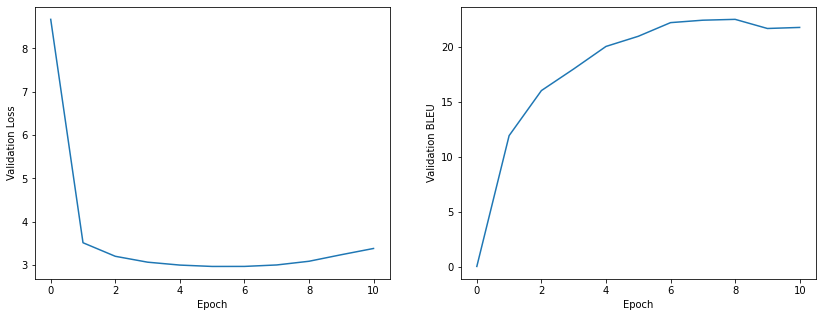

In [22]:
experiment_results = load_experiment_log(experiment_name=EXPERIMENT_NAME)
plot_single_learning_curve(experiment_results[0]['results'])

In [23]:
summarize_results(experiment_results)[['model_name', 'best_val_loss', 'best_val_bleu', 'runtime', 
                                       'total_params', 'trainable_params', 'dt_created']]

,model_name,best_val_loss,best_val_bleu,runtime,total_params,trainable_params,dt_created
0,en-od-rnn-without-attn-2020-04-22 04:31:00,2.96698,22.490249,10.115134,32018094,32018094,2020-04-22 04:42:13


In [25]:
# reload model 
MODEL_NAME_TO_RELOAD = 'en-od-rnn-without-attn-2020-04-22 04:31:00'
checkpoint = torch.load('/content/drive/My Drive/ds1012/MT/model_checkpoints/{}.pth.tar'.format(MODEL_NAME_TO_RELOAD), map_location=device)
model.load_state_dict(checkpoint)

<All keys matched successfully>

In [26]:
# check performance on validation set 
val_loss, val_bleu, val_hyp_idxs, val_ref_idxs, val_source_idxs, val_hyp_tokens, val_ref_tokens, val_source_tokens,\
val_attn = evaluate(model=model, loader=loaders_full['dev'], 
                    src_id2token=vocab[SRC_LANG]['id2token'], targ_id2token=vocab[TARG_LANG]['id2token'])
print("Validation BLEU: {:.2f} | Validation Loss: {:.2f}".format(val_bleu, val_loss))

Validation BLEU: 22.49 | Validation Loss: 3.09


In [27]:
test_loss, test_bleu, test_hyp_idxs, test_ref_idxs, test_source_idxs, test_hyp_tokens, test_ref_tokens, test_source_tokens,\
test_attn = evaluate(model=model, loader=loaders_full['test'], 
                     src_id2token=vocab[SRC_LANG]['id2token'], targ_id2token=vocab[TARG_LANG]['id2token'])
print("Test BLEU: {:.2f} | Test Loss: {:.2f}".format(test_bleu, test_loss))

Test BLEU: 17.44 | Test Loss: 3.70
